In [1]:
import numpy as np
import pandas as pd
import pandera as pa
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Criação do dataframe
df = pd.read_csv("/home/guto-linux/Projetos/Analise de Dados/TRN02/sadf.csv")
df.head()

,trn02.wisedb.local;600;2021-09-07 00:10:11;0.10;0.00;0.08;0.02;0.00;99.80
0,trn02.wisedb.local;600;2021-09-07 00:20:11;0.0...
1,trn02.wisedb.local;600;2021-09-07 00:30:11;0.1...
2,trn02.wisedb.local;600;2021-09-07 00:40:11;0.0...
3,trn02.wisedb.local;600;2021-09-07 00:50:11;0.0...
4,trn02.wisedb.local;600;2021-09-07 01:00:11;0.0...


In [3]:
#Inclusão do separador ";" no dataframe
df = pd.read_csv("/home/guto-linux/Projetos/Analise de Dados/TRN02/sadf.csv", sep=";")
df.head()

,trn02.wisedb.local,600,2021-09-07 00:10:11,0.10,0.00,0.08,0.02,0.00.1,99.80
0,trn02.wisedb.local,600,2021-09-07 00:20:11,0.09,0.0,0.07,0.01,0.0,99.83
1,trn02.wisedb.local,600,2021-09-07 00:30:11,0.10,0.0,0.07,0.02,0.0,99.82
2,trn02.wisedb.local,600,2021-09-07 00:40:11,0.08,0.0,0.07,0.01,0.0,99.84
3,trn02.wisedb.local,600,2021-09-07 00:50:11,0.09,0.0,0.07,0.01,0.0,99.83
4,trn02.wisedb.local,600,2021-09-07 01:00:11,0.09,0.0,0.07,0.01,0.0,99.83


In [4]:
#Renomear as colunas
#df = df.set_axis(['hostname', 'interval', 'timestamp', '%user', '%nice', '%system', '%iowait', '%steal', '%idle'], axis='columns')
#df.columns = ['hostname', 'interval', 'timestamp', '%user', '%nice', '%system', '%iowait', '%steal', '%idle']
#df.head()

In [5]:
#Adicionar um cabeçalho para as colunas
df = pd.read_csv("/home/guto-linux/Projetos/Analise de Dados/TRN02/sadf.csv", sep=";", names=['hostname', 'interval', 'timestamp', '%user', '%nice', '%system', '%iowait', '%steal', '%idle'])
df.head()

,hostname,interval,timestamp,%user,%nice,%system,%iowait,%steal,%idle
0,trn02.wisedb.local,600,2021-09-07 00:10:11,0.10,0.0,0.08,0.02,0.0,99.80
1,trn02.wisedb.local,600,2021-09-07 00:20:11,0.09,0.0,0.07,0.01,0.0,99.83
2,trn02.wisedb.local,600,2021-09-07 00:30:11,0.10,0.0,0.07,0.02,0.0,99.82
3,trn02.wisedb.local,600,2021-09-07 00:40:11,0.08,0.0,0.07,0.01,0.0,99.84
4,trn02.wisedb.local,600,2021-09-07 00:50:11,0.09,0.0,0.07,0.01,0.0,99.83


In [6]:
#Verificação dos tipos de dados
df.dtypes

hostname      object
interval       int64
timestamp     object
%user        float64
%nice        float64
%system      float64
%iowait      float64
%steal       float64
%idle        float64
dtype: object

In [7]:
#Inclusão dos parâmetros 'parse_dates' e 'dayfirst' no dataframe
df = pd.read_csv("/home/guto-linux/Projetos/Analise de Dados/TRN02/sadf.csv", sep=";", parse_dates=['timestamp'], names=['hostname', 'interval', 'timestamp', '%user', '%nice', '%system', '%iowait', '%steal', '%idle'])
df.head()

,hostname,interval,timestamp,%user,%nice,%system,%iowait,%steal,%idle
0,trn02.wisedb.local,600,2021-09-07 00:10:11,0.10,0.0,0.08,0.02,0.0,99.80
1,trn02.wisedb.local,600,2021-09-07 00:20:11,0.09,0.0,0.07,0.01,0.0,99.83
2,trn02.wisedb.local,600,2021-09-07 00:30:11,0.10,0.0,0.07,0.02,0.0,99.82
3,trn02.wisedb.local,600,2021-09-07 00:40:11,0.08,0.0,0.07,0.01,0.0,99.84
4,trn02.wisedb.local,600,2021-09-07 00:50:11,0.09,0.0,0.07,0.01,0.0,99.83


In [8]:
#Verificação dos tipos de dados
df.dtypes

hostname             object
interval              int64
timestamp    datetime64[ns]
%user               float64
%nice               float64
%system             float64
%iowait             float64
%steal              float64
%idle               float64
dtype: object

In [9]:
#Validação dos dados
schema = pa.DataFrameSchema(
    columns = {
        "hostname": pa.Column(pa.String),
        "interval": pa.Column(pa.Int),
        "timestamp": pa.Column(pa.DateTime),
        "%user": pa.Column(pa.Float),
        "%nice": pa.Column(pa.Float),
        "%system": pa.Column(pa.Float),
        "%iowait": pa.Column(pa.Float),
        "%steal": pa.Column(pa.Float),
        "%idle": pa.Column(pa.Float)
    }
)
schema.validate(df)

,hostname,interval,timestamp,%user,%nice,%system,%iowait,%steal,%idle
0,trn02.wisedb.local,600,2021-09-07 00:10:11,0.10,0.0,0.08,0.02,0.0,99.80
1,trn02.wisedb.local,600,2021-09-07 00:20:11,0.09,0.0,0.07,0.01,0.0,99.83
2,trn02.wisedb.local,600,2021-09-07 00:30:11,0.10,0.0,0.07,0.02,0.0,99.82
3,trn02.wisedb.local,600,2021-09-07 00:40:11,0.08,0.0,0.07,0.01,0.0,99.84
4,trn02.wisedb.local,600,2021-09-07 00:50:11,0.09,0.0,0.07,0.01,0.0,99.83
...,...,...,...,...,...,...,...,...,...
3427,trn02.wisedb.local,599,2021-09-30 23:10:01,0.57,0.0,0.46,2.87,0.0,96.10
3428,trn02.wisedb.local,600,2021-09-30 23:20:01,0.46,0.0,0.46,1.74,0.0,97.34
3429,trn02.wisedb.local,600,2021-09-30 23:30:01,0.44,0.0,0.45,1.73,0.0,97.37
3430,trn02.wisedb.local,600,2021-09-30 23:40:01,0.48,0.0,0.56,1.96,0.0,97.00


In [10]:
#Criação da coluna '%used' (percentual utilizado da cpu)
df["%used"] = df["%user"] + df["%nice"] + df["%system"] + df["%iowait"] + df["%steal"]
df

,hostname,interval,timestamp,%user,%nice,%system,%iowait,%steal,%idle,%used
0,trn02.wisedb.local,600,2021-09-07 00:10:11,0.10,0.0,0.08,0.02,0.0,99.80,0.20
1,trn02.wisedb.local,600,2021-09-07 00:20:11,0.09,0.0,0.07,0.01,0.0,99.83,0.17
2,trn02.wisedb.local,600,2021-09-07 00:30:11,0.10,0.0,0.07,0.02,0.0,99.82,0.19
3,trn02.wisedb.local,600,2021-09-07 00:40:11,0.08,0.0,0.07,0.01,0.0,99.84,0.16
4,trn02.wisedb.local,600,2021-09-07 00:50:11,0.09,0.0,0.07,0.01,0.0,99.83,0.17
...,...,...,...,...,...,...,...,...,...,...
3427,trn02.wisedb.local,599,2021-09-30 23:10:01,0.57,0.0,0.46,2.87,0.0,96.10,3.90
3428,trn02.wisedb.local,600,2021-09-30 23:20:01,0.46,0.0,0.46,1.74,0.0,97.34,2.66
3429,trn02.wisedb.local,600,2021-09-30 23:30:01,0.44,0.0,0.45,1.73,0.0,97.37,2.62
3430,trn02.wisedb.local,600,2021-09-30 23:40:01,0.48,0.0,0.56,1.96,0.0,97.00,3.00


In [11]:
#Média de uso por dia
df.groupby(df.timestamp.dt.day)["%used"].mean()

timestamp
7     0.190629
8     3.751049
9     2.537902
10    2.609231
11    2.761538
12    2.569091
13    2.689441
14    2.653497
15    2.846783
16    3.237203
17    2.689231
18    3.200629
19    2.817273
20    4.786783
21    5.051678
22    3.058462
23    2.954685
24    2.637203
25    3.592448
26    2.871469
27    2.731469
28    2.799161
29    4.539231
30    3.522238
Name: %used, dtype: float64

In [12]:
#Pico de uso por dia
df.groupby(df.timestamp.dt.day)["%used"].max()

timestamp
7      0.52
8     82.88
9     16.94
10    11.69
11    18.94
12    12.47
13    15.66
14    18.46
15    50.09
16    21.62
17    20.93
18    14.91
19    16.40
20    59.92
21    65.27
22    36.02
23    30.98
24    17.36
25    26.27
26    19.01
27    17.66
28    18.26
29    77.49
30    31.54
Name: %used, dtype: float64

In [13]:
#Mínimo de uso por dia
df.groupby(df.timestamp.dt.day)["%used"].min()

timestamp
7     0.14
8     0.15
9     0.78
10    2.07
11    2.08
12    2.04
13    2.07
14    2.05
15    2.05
16    2.11
17    2.08
18    2.15
19    2.15
20    1.66
21    1.70
22    1.41
23    1.68
24    1.66
25    1.79
26    1.91
27    1.88
28    1.77
29    1.79
30    1.91
Name: %used, dtype: float64

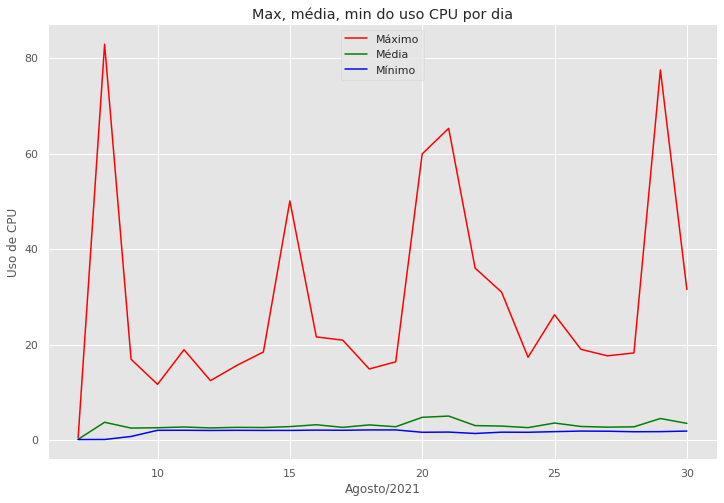

In [21]:
#Gráfico de uso de cpu por dia Agosto/2021
plt.style.use('ggplot')
df.groupby(df.timestamp.dt.day)["%used"].max().plot(title="Max, média, min do uso CPU por dia",color="red",figsize=(12,8))
df.groupby(df.timestamp.dt.day)["%used"].mean().plot(title="Max, média, min do uso CPU por dia",color="green",figsize=(12,8))
df.groupby(df.timestamp.dt.day)["%used"].min().plot(title="Max, média, min do uso CPU por dia",color="blue",figsize=(12,8))
plt.ylabel("Uso de CPU")
plt.xlabel("Agosto/2021");
plt.legend(['Máximo','Média','Mínimo']);
plt.savefig("Gráfico de uso de cpu por dia Agosto-2021.png")

In [15]:
#Média de uso por hora
df.groupby(df.timestamp.dt.hour)["%used"].mean()

timestamp
0     2.318000
1     2.274306
2     3.315833
3     2.307361
4     2.275208
5     2.207361
6     2.600625
7     2.208264
8     3.369653
9     5.304583
10    6.110556
11    2.895833
12    2.954306
13    3.002083
14    3.007639
15    2.408403
16    2.646111
17    2.433056
18    2.503472
19    2.441806
20    2.323750
21    2.405694
22    6.640208
23    3.022917
Name: %used, dtype: float64

In [16]:
#Pico de uso por hora
df.groupby(df.timestamp.dt.hour)["%used"].max()

timestamp
0      3.89
1      4.19
2     36.02
3      6.31
4      5.36
5      3.68
6     16.40
7      3.73
8     61.66
9     82.88
10    65.27
11    13.67
12    10.05
13    14.81
14    13.83
15    12.47
16    28.37
17    13.85
18    10.02
19     8.07
20     5.36
21     6.06
22    77.49
23    26.27
Name: %used, dtype: float64

In [17]:
#Mínimo de uso por hora
df.groupby(df.timestamp.dt.hour)["%used"].min()

timestamp
0     0.16
1     0.17
2     0.14
3     0.17
4     0.17
5     0.17
6     0.17
7     0.16
8     0.16
9     0.15
10    0.16
11    0.17
12    0.16
13    0.16
14    0.16
15    0.17
16    0.16
17    0.17
18    0.17
19    0.17
20    0.16
21    0.17
22    0.17
23    0.18
Name: %used, dtype: float64

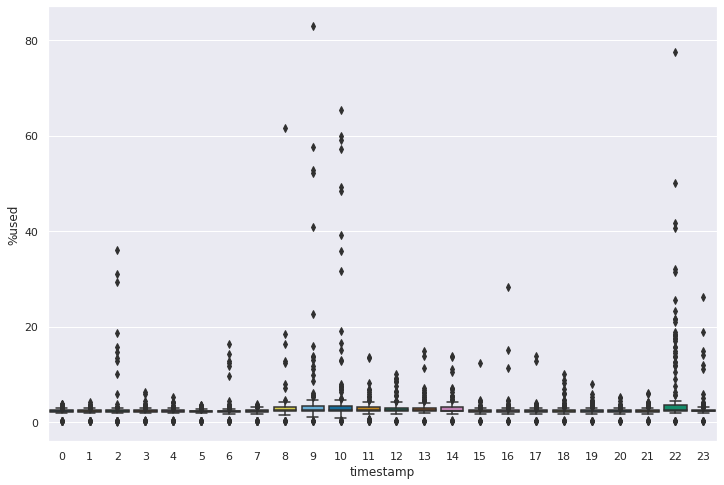

In [18]:
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.boxplot(x=df.timestamp.dt.hour, y='%used', data=df, palette="colorblind")
#df.boxplot(column=['%used'], by=df["timestamp"].dt.hour, fontsize=18, return_type=None, figsize=(30,10));

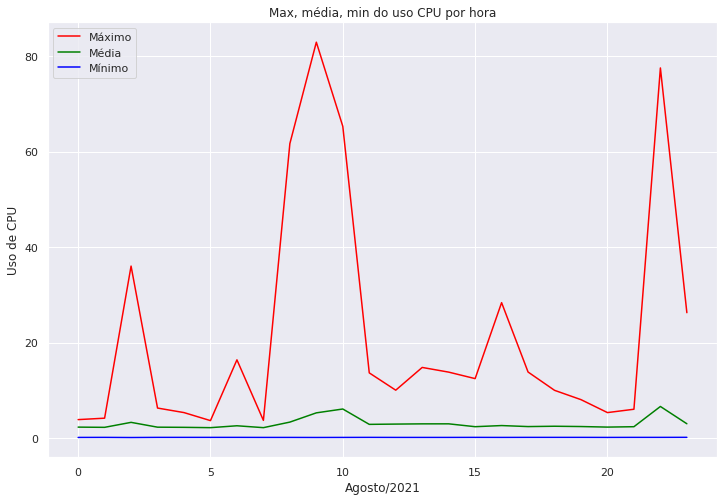

In [19]:
#Gráfico de uso de cpu por hora Agosto/2021
df.groupby(df.timestamp.dt.hour)["%used"].max().plot(title="Max, média, min do uso CPU por hora",color="red",figsize=(12,8))
df.groupby(df.timestamp.dt.hour)["%used"].mean().plot(title="Max, média, min do uso CPU por hora",color="green",figsize=(12,8))
df.groupby(df.timestamp.dt.hour)["%used"].min().plot(title="Max, média, min do uso CPU por hora",color="blue",figsize=(12,8))
plt.ylabel("Uso de CPU");
plt.xlabel("Agosto/2021");
plt.legend(['Máximo','Média','Mínimo']);
plt.savefig("Gráfico de uso de cpu por hora Agosto-2021.png")